# DARGEL FLORIAN -- TP movie lens

# SVD and weighted SVD on Movie lens

a) $\underline{What \; is \; the \;  Movie \; Lens \; data \; set?}$

Les ensembles de données MovieLens ont été collectés par le projet de recherche GroupLens
à l'Université du Minnesota.
 
Cet ensemble de données se compose de :
	* 100 000 évaluations (1-5) de 943 utilisateurs sur 1682 films. 
	* Chaque utilisateur a évalué au moins 20 films. 

Les données ont été collectées sur le site web MovieLens
(movielens.umn.edu) pendant une période de sept mois allant du 19 septembre 1997 au 22 avril 1998,  1997 au 22 avril 1998. Ces données ont été nettoyées - les utilisateurs qui avaient moins de 20 évaluations ou qui n'avaient pas d'informations démographiques complètes ont été supprimés de cet ensemble de données. 

b) $\underline{Why \; is \; it \; preferable \; to \; begin \; with \; the \; MovieLens \; 100K \; Dataset?}$

Il est préférable de commencer par une base qui contient mois de données (100k) que les autres données (1M), (10M) (20M). Les raisons :

- Le temps de traitement peut être plus rapide 
- Sur une petite base de données on peut avoir une idée du fonctionnement et l'appliquer sur une base beaucoup plus grande. 
- On peut comparer pour plus tard les performances sur ce jeux de données (100k) et sur un jeux de données plus grande (exemple 1M)

In [1]:
import pandas as pd #importation data
import numpy as np #manipulation vecteur
from numpy import random #random : aléatoire
import scipy
import scipy. sparse

names = ['user_id', 'movies', 'rating', 'timestamp']

data_dir = "ml-100k/"
data_shape = (943 , 1682)
df = pd.read_csv (data_dir + "u.data ", sep ="\t", header = None, names=names)

In [2]:
df 

,user_id,movies,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
values = df.values #on prend les valeur de la matrice
values [:, 0:2] -= 1 #on enleve -1 pour les valeurs de la 1ère colonne et la 2ème car sur python l'indice commence à 0
M = scipy.sparse.csr_matrix (( values [:, 2], ( values [:, 0], values [:, 1])),
                             dtype= np.float,shape = data_shape )

In [4]:
M 

<943x1682 sparse matrix of type '<class 'numpy.float64'>'
	with 100000 stored elements in Compressed Sparse Row format>

In [5]:
print(M)

  (0, 0)	5.0
  (0, 1)	3.0
  (0, 2)	4.0
  (0, 3)	3.0
  (0, 4)	3.0
  (0, 5)	5.0
  (0, 6)	4.0
  (0, 7)	1.0
  (0, 8)	5.0
  (0, 9)	3.0
  (0, 10)	2.0
  (0, 11)	5.0
  (0, 12)	5.0
  (0, 13)	5.0
  (0, 14)	5.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 17)	4.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	1.0
  (0, 21)	4.0
  (0, 22)	4.0
  (0, 23)	3.0
  (0, 24)	4.0
  :	:
  (942, 738)	4.0
  (942, 755)	2.0
  (942, 762)	4.0
  (942, 764)	3.0
  (942, 784)	2.0
  (942, 793)	3.0
  (942, 795)	3.0
  (942, 807)	4.0
  (942, 815)	4.0
  (942, 823)	4.0
  (942, 824)	3.0
  (942, 830)	2.0
  (942, 839)	4.0
  (942, 927)	5.0
  (942, 940)	1.0
  (942, 942)	5.0
  (942, 1010)	2.0
  (942, 1027)	2.0
  (942, 1043)	3.0
  (942, 1046)	2.0
  (942, 1066)	2.0
  (942, 1073)	4.0
  (942, 1187)	3.0
  (942, 1227)	3.0
  (942, 1329)	3.0


d) $\underline{Différence \; entre \; table \; df \; et \; la \; matrice \; M ?}$

M : matrice creuse (sparse)

Il s'agit d'une matrice de taille 1682 (films) x 943 (utilisateurs) 

    qui contient 100 000 évaluation (1 à 5), on a aussi des cases vides (des films qui n'ont pas été évalué par l'utilisateur)

df : matrice de taille 4 x 100 000 (evaluation) 

    La premiere colonne : utilisateur 
    la deuxieme colonne : film 
    la troisieme colonne : evaluation 
    la quatrieme colonne : timescamp ( cette colonne nous interesse pas)
Remarque : ce qui nous intéresse sont les 3 premières colonnes de la matrice df.

Grâce à la commande ci_dessous whos on peut voir les informations sur la variable (Type, Data/Info)

In [6]:
whos 

Variable          Type                          Data/Info
---------------------------------------------------------
M                 csr_matrix                      (0, 0)	5.0\n  (0, 1)	3.<...>7)	3.0\n  (942, 1329)	3.0
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
data_dir          str                           ml-100k/
data_shape        tuple                         n=2
df                DataFrame                            user_id  movies  r<...>[100000 rows x 4 columns]
get_ipython       function                      <function get_ipython at 0x000002493D0AD048>
getsizeof         builtin_function_or_method    <built-in function getsizeof>
json              module                        <module 'json' from 'C:\\<...>\lib\\json\\__init__.py'>
names             list                          n=4
np                module                        <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                module        

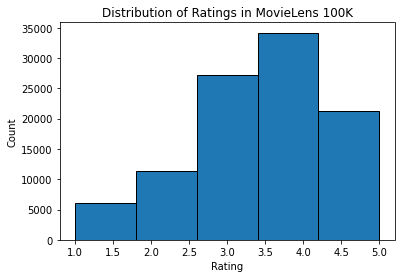

In [9]:
import matplotlib.pyplot as plt 
plt.hist(df['rating'], bins=5, ec='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in MovieLens 100K')
plt.show()

Lorsqu'on observe la distribution du nombre d'évaluations différentes. On observe une distribution normale, avec la plupart des évaluations centrées sur 3-4.

#  Pre process the data 

a) $\underline{what \; is \; the \; type \; sparse?}$

In [7]:
#utile pour savoir que fait la commande
?scipy.sparse 

On a uiliser la commande $\textbf{scipy.sparse.csr_matrix}$ 

Type sparse : Compressed Sparse Row matrix (on compresse la matrice par ligne)

Les matrices sparses peuvent être utilisées dans les opérations arithmétiques : elles supportent l'addition, la soustraction, la multiplication, la division et la puissance matricielle. Les opérations arithmétiques efficaces CSR + CSR, CSR * CSR, etc.

b) $\underline{Split \; the \; data \; into \; two \; matrices. \; Use \; 90\% \; for \; training \; and \; 10\% \; for \;testing.\;}$

In [10]:
ind = np. random . permutation ( range (100000) ) #indice aléatoire 
inda = ind [0:90000] #90 %
indt = ind [90000:] #10 %
M = scipy.sparse.csr_matrix (( values [:, 2], ( values [:, 0], values [:, 1])), dtype
= np.float, shape = data_shape ) 
Ma = scipy.sparse.csr_matrix (( values [inda , 2], ( values [inda , 0], values [inda ,
1]) ), dtype = np.float , shape = data_shape ) #données d'apprentissage
Mt = scipy . sparse.csr_matrix (( values [indt , 2], ( values [indt , 0], values [indt ,
1]) ), dtype = np.float , shape = data_shape ) #données test

On sépare nos jeux de données en apprentissage 90% et test 10%.

In [11]:
nt = np.sum(Mt>.5)
print(nt)

#Deuxième façon de faire 
nt = Mt.count_nonzero() #compte le nombre d'évaluation non manquante
print(nt)

10000
10000


On observe bien 1000 evaluations (notes) pour la variable nt 

c) $\underline{Compute \; the \;  mean \; ratings \; given \; by \; the \;  users \; to \; the \; movies.}$

In [12]:
moy = np.sum (Ma)/np.sum(Ma >.5) #revient à diviser par 90 0000  
print('Sur les données d apprentissage la note d evaluation moyenne attribuées par les utilisateurs aux films = {0:.3f}'.format(moy))#on calcul la moyenne

Sur les données d apprentissage la note d evaluation moyenne attribuées par les utilisateurs aux films = 3.528


d) $\underline{Compute \; the \; mean \; test \; error \;Et \;when \;predicting \;missing \;ratings \;by \;the \;mean}$

1ère méthode

In [13]:
Mt_bis = Mt.copy() #Mt_bis c'est Mt_pred : la prediction
Mt_bis [Mt_bis>.5] = moy #Mt_bis>.5 : ture or false 
print(Mt_bis)# on remplace les valeurs par moy 

  (0, 5)	3.528322222222222
  (0, 29)	3.528322222222222
  (0, 32)	3.528322222222222
  (0, 41)	3.528322222222222
  (0, 49)	3.528322222222222
  (0, 73)	3.528322222222222
  (0, 74)	3.528322222222222
  (0, 76)	3.528322222222222
  (0, 80)	3.528322222222222
  (0, 84)	3.528322222222222
  (0, 110)	3.528322222222222
  (0, 120)	3.528322222222222
  (0, 134)	3.528322222222222
  (0, 174)	3.528322222222222
  (0, 179)	3.528322222222222
  (0, 185)	3.528322222222222
  (0, 210)	3.528322222222222
  (0, 229)	3.528322222222222
  (0, 236)	3.528322222222222
  (0, 247)	3.528322222222222
  (0, 266)	3.528322222222222
  (0, 268)	3.528322222222222
  (0, 271)	3.528322222222222
  (1, 0)	3.528322222222222
  (1, 24)	3.528322222222222
  :	:
  (941, 123)	3.528322222222222
  (941, 182)	3.528322222222222
  (941, 192)	3.528322222222222
  (941, 214)	3.528322222222222
  (941, 260)	3.528322222222222
  (941, 299)	3.528322222222222
  (941, 303)	3.528322222222222
  (941, 314)	3.528322222222222
  (941, 315)	3.528322222222222
  (9

In [14]:
Diff = (Mt-Mt_bis)

In [15]:
Et = (np.sum(Diff.power(2))) / nt 
print('On obtient comme erreur= {0:.3f}'.format(Et))#on calcul la moyenne
print('On obtient cela quand on calcule l erreur de test moyenne quand on prédit les évaluations manquantes par la moyenne.')

On obtient comme erreur= 1.237
On obtient cela quand on calcule l erreur de test moyenne quand on prédit les évaluations manquantes par la moyenne.


2ème méthode

In [16]:
maskt = (Mt > .5) #mask sur les données test
Mpred = maskt.multiply(moy)
erreur = np.sum((Mt- Mpred).power(2))/nt
print('On obtient comme erreur= {0:.3f}'.format(Et))
print('On obtient cela quand on calcule l erreur de test moyenne quand on prédit les évaluations manquantes par la moyenne.')

On obtient comme erreur= 1.237
On obtient cela quand on calcule l erreur de test moyenne quand on prédit les évaluations manquantes par la moyenne.


c) $\underline{Center \; the \; data}$

On centre nos données d'apprentissage et aussi nos données test

In [17]:
#Données d'apprentissage
MaskA = (Ma>.5) #mask sur les données d'apprentissage
MpredA = MaskA.multiply(moy)

Ma_centre = Ma - MpredA
print(Ma_centre)

  (0, 0)	1.4716777777777779
  (0, 1)	-0.5283222222222221
  (0, 2)	0.47167777777777786
  (0, 3)	-0.5283222222222221
  (0, 4)	-0.5283222222222221
  (0, 6)	0.47167777777777786
  (0, 7)	-2.528322222222222
  (0, 8)	1.4716777777777779
  (0, 9)	-0.5283222222222221
  (0, 10)	-1.5283222222222221
  (0, 11)	1.4716777777777779
  (0, 12)	1.4716777777777779
  (0, 13)	1.4716777777777779
  (0, 14)	1.4716777777777779
  (0, 15)	1.4716777777777779
  (0, 16)	-0.5283222222222221
  (0, 17)	0.47167777777777786
  (0, 18)	1.4716777777777779
  (0, 19)	0.47167777777777786
  (0, 20)	-2.528322222222222
  (0, 21)	0.47167777777777786
  (0, 22)	0.47167777777777786
  (0, 23)	-0.5283222222222221
  (0, 24)	0.47167777777777786
  (0, 25)	-0.5283222222222221
  :	:
  (942, 721)	-0.5283222222222221
  (942, 731)	0.47167777777777786
  (942, 738)	0.47167777777777786
  (942, 755)	-1.5283222222222221
  (942, 762)	0.47167777777777786
  (942, 764)	-0.5283222222222221
  (942, 784)	-1.5283222222222221
  (942, 793)	-0.5283222222222221

In [18]:
#Données test 
MaskB = (Mt>.5) #masque sur les données test
MpredB = MaskB.multiply(moy)

Mt_centre = Mt - MpredB
print(Mt_centre)

  (0, 5)	1.4716777777777779
  (0, 29)	-0.5283222222222221
  (0, 32)	0.47167777777777786
  (0, 41)	1.4716777777777779
  (0, 49)	1.4716777777777779
  (0, 73)	-2.528322222222222
  (0, 74)	0.47167777777777786
  (0, 76)	0.47167777777777786
  (0, 80)	1.4716777777777779
  (0, 84)	-0.5283222222222221
  (0, 110)	1.4716777777777779
  (0, 120)	0.47167777777777786
  (0, 134)	0.47167777777777786
  (0, 174)	1.4716777777777779
  (0, 179)	-0.5283222222222221
  (0, 185)	0.47167777777777786
  (0, 210)	-0.5283222222222221
  (0, 229)	0.47167777777777786
  (0, 236)	-1.5283222222222221
  (0, 247)	0.47167777777777786
  (0, 266)	0.47167777777777786
  (0, 268)	1.4716777777777779
  (0, 271)	-0.5283222222222221
  (1, 0)	0.47167777777777786
  (1, 24)	0.47167777777777786
  :	:
  (941, 123)	0.47167777777777786
  (941, 182)	-0.5283222222222221
  (941, 192)	1.4716777777777779
  (941, 214)	1.4716777777777779
  (941, 260)	0.47167777777777786
  (941, 299)	1.4716777777777779
  (941, 303)	1.4716777777777779
  (941, 314)	0

# Recommend using SVD

a) Predict the missing test values using the SVD with an increasing number of component
(up to 20). Evaluate the performance of this approach on the test matrix and plot the
resulting performance as a function of the number of factors of the SVD used to perform the
reconstruction.

In [19]:
from scipy.stats import ortho_group
from scipy.sparse import diags
from scipy.sparse.linalg import svds

On va d'abord calculer les valeurs manquantes du test en utilisant le SVD avec un nombre croissant de composante k=1 pour visualiser l'erreur.

Etape 1] Decomposition

On factorise la matrice centré réduite Ma_centre sous forme de 3 matrice , on les note : u_1, s_1, v_1

In [20]:
u_1, s_1, v_1 = svds(Ma_centre, k=1)

In [21]:
u_1.shape, s_1.shape, v_1.shape

((943, 1), (1,), (1, 1682))

On verifie la dimension des matrices pour qu'on puisse faire ensuite le produit matriciel

Etape 2] Pour la prediction M_pred_1

On a les valeurs qui on été prédite, on note : M_pred_1

In [22]:
M_pred_1 = u_1 @ np.diag(s_1) @ v_1

Etape 3] Pour l'erreur 

In [23]:
PredT_1 = MaskB.multi
ply(M_pred_1)

In [24]:
erreur_1 = np.sum((Mt_centre- PredT_1).power(2))/nt
print('On obtient comme erreur avec k=1 : {0:.3f}'.format(erreur_1))

On obtient comme erreur avec k=1 : 1.144


Il s'agit d'une erreur correcte qui est assez proche de l'erreur moyenne

Evaluons maintenant l'erreur pour un nombre croissant de composante en allant de 1 à 20 : 

In [25]:
from time import time 
t0 = time() 
p=20
composante = []
error = np.zeros(p)
for i in range(1,p+1):
    u , s, v =svds(Ma_centre, k=i)
    M_pred_ = u @ np.diag(s) @ v
    PredT = MaskB.multiply(M_pred_)
    error[i-1] = np.sum((Mt_centre- PredT).power(2))/nt 
    composante.append(i)
    print("Nombre de composante " + str(composante[i-1]) + " à pour erreur " + str(error[i-1])) 

    
err_svd = min(error)
index_svd = np.argmin(error)
print("\n Le nombre de facteur optimal est " + str(index_svd) + " avec pour erreur " + str(err_svd))
t1 = time()
t_svd = t1 - t0
print('\n Temps de calcul : {0:.3f}'.format( t1 - t0 ))
#print(composante)
#print(error)
#print(t_svd)

Nombre de composante 1 à pour erreur 1.1443395557940688
Nombre de composante 2 à pour erreur 1.105232139489726
Nombre de composante 3 à pour erreur 1.0889047561119838
Nombre de composante 4 à pour erreur 1.072379361362709
Nombre de composante 5 à pour erreur 1.0636488095647407
Nombre de composante 6 à pour erreur 1.056959043413678
Nombre de composante 7 à pour erreur 1.051790405188406
Nombre de composante 8 à pour erreur 1.0464319140672598
Nombre de composante 9 à pour erreur 1.0401250594961404
Nombre de composante 10 à pour erreur 1.038575659624882
Nombre de composante 11 à pour erreur 1.0346890809583758
Nombre de composante 12 à pour erreur 1.0358351984111165
Nombre de composante 13 à pour erreur 1.036092079457105
Nombre de composante 14 à pour erreur 1.0364575572833534
Nombre de composante 15 à pour erreur 1.0363469920657393
Nombre de composante 16 à pour erreur 1.0380125502365618
Nombre de composante 17 à pour erreur 1.0378921756120592
Nombre de composante 18 à pour erreur 1.039838

On affiche ci-dessous  l'évalution des erreurs en fonction des valeurs des composantes

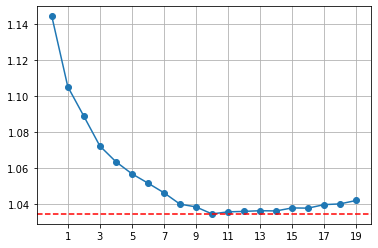

In [26]:
import matplotlib.pyplot as plt
err_svd = min(error)
index_svd = np.argmin(error)

plt.plot(error,'o-')
plt.axhline(y=err_svd,color='red',linestyle='--') #erreur minimal
plt.grid(True)
plt.xticks(np.arange(1,20, step=2))
plt.show() 

On observe sur le graphique une intersection entre la courbe bleu et la courbe rouge. Depuis l'intersection, si on se projecte sur l'axe des abscisses on trouve bien la valeur optimal du nombre de facteur pour minimser l'erreur 

What is, in this case, the optimal number of factors? 

In [28]:
index_svd

10

Sur le graphique on peut observer que la valeure optimale du nombre de facteur est de 10 car il s'agit de l'erreur minimale

4\. $\underline{Check \; if \;  you \; can \; improve \; the \; predictions \; using \; the \; weighted \; SVD}$ 

4.a) First use the approach proposed by  Marlin or Srebro and Jaakkola implementing the following sequence:
$$
\begin{array}{rll}
loop & & & \\
&F &=& W M  + (1-W) Z^{k} \\
&U,V &=& svd(F) \\
&Z^{k+1} &=& U V^\top 
\end{array}
$$
For details see for instance:

In [29]:
Mest = 0*Ma_centre #matrice d'apprentissage sparse
un = np.ones((943,1682))
un_m_mask = scipy.sparse.csr_matrix(un - MaskA) 

In [30]:
p = 20
errw = np.zeros(p)
to = time() 
for i in range(1,p+1):
    for ii in range(1,30):
        Y = Ma_centre + un_m_mask.multiply(Mest);
        U, D, Vt = scipy.sparse.linalg.svds(Y,k=i)
        Mest = np.dot(np.dot(U,np.diag(D)), Vt)
    
    Merr = Mt_centre - MaskB.multiply(Mest)
    errw[i-1] = np.sum(Merr.power(2))/nt 
    
t1 = time()
print('\n temps de calcul : {0:.3f}'.format( t1 - t0 ))


 temps de calcul : 211.731


In [31]:
print(errw)
#print(Merr)

[1.01202594 0.89913968 0.85843274 0.86588715 0.86319365 0.88266606
 0.89373058 0.92458089 0.95563107 0.9798257  1.01458353 1.04893561
 1.07663345 1.10985005 1.14225968 1.17594017 1.2142977  1.25347481
 1.29248586 1.33417788]


In [32]:
errw_svd= min(errw)
index_svd_bis = np.argmin(errw)

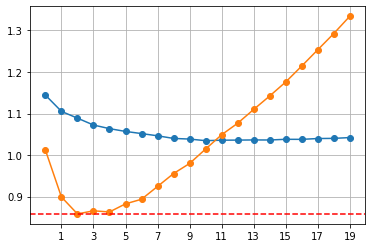

In [33]:
plt.plot(error,'o-')
plt.plot(errw, 'o-')
plt.axhline(y=errw_svd,color='red',linestyle='--') #erreur minimal
plt.grid(True)
plt.xticks(np.arange(1,20, step=2))
plt.show() 

On observe qu'on a améliorer les prédictions en utilisant les poids pondérées du SVD.
L'erreur de prédiction (courbe orange) est inférieur comparé à l'approche précédente (courbe bleu) environ entre 1 et 11 composantes. C'est le contraire après 11 composante.

5] $\underline{Solve \; the \; penalized \; weighted \; SVD \; problem}$  
$$
\min_{U,V} \|M - UV^\top\|_W^2 + \lambda \|U\|^2+ \lambda \|V\|^2
$$
with $\lambda = 5$ by implementing the penalised Alternating Least Square(ALS) described as follows:

Initialize $U$ and $V$ with the SVD on the full matrix
$$
\begin{array}{rl}
loop &  \\
&  \text{compute } U \text{ that } \min_{U} \|M - UV^\top\|_W^2 + \lambda \|U\|^2 \text{ with a fix } V \\
&  \text{compute } V \text{ that }  \min_{V} \|M - UV^\top\|_W^2 + \lambda \|V\|^2 \text{ with a fix } U 
\end{array}
$$

In [34]:
n,p = Ma.shape

In [35]:
kmax = 10 #deterministe
lam = 5 #on fixe lambda=5 d'aprés l'énoncé
err_als = np.zeros(kmax-1)
for k in range(1,kmax):
    I = np.eye(k)
    erri = np.zeros((20+1,)) 
    U, D, Vt = scipy.sparse.linalg.svds(Ma_centre,k=k)
    Vt = np.dot(np.diag(D), Vt)
    
    Merr = Mt_centre - MaskB.multiply(U@Vt)
    erri[0] = np.sum(Merr.power(2))/nt 
    
    for nb in range(0,20):
        for j in range(0,p):
            indj = MaskA[:,j].nonzero()[0]
            Vt[:,j] = np.linalg.solve(U[indj,:].T@U[indj,:] + lam*I, U[indj,:].T@Ma_centre[indj,j]).T
            
        
        
        for i in range(0,n):
            indi = MaskA[i,:].nonzero()[1]
            U[i,:] = np.ndarray.flatten(np.linalg.solve(Vt[:,indi]@Vt[:,indi].T + lam*I, Vt[:,indi]@Ma_centre[i,indi].T))
            
    Merr = Mt_centre - MaskB.multiply(U@Vt)
    erri[nb+1] = np.sum(Merr.power(2))/nt 
    print(erri[nb+1])
    err_als[k-1] = erri[nb+1]

0.9934952752073885
0.8903911757206809
0.8566065741303704
0.8487650867166223
0.8507088458796934
0.8600472014707174
0.8678796369821655
0.865601319331941
0.8793951604340611


In [36]:
errw_svd2= min(err_als)
#index_svd_bis2 = np.argmin(errw_svd2)

In [37]:
print("L'erreur minimale obtenue est " + str(errw_svd2))

L'erreur minimale obtenue est 0.8487650867166223


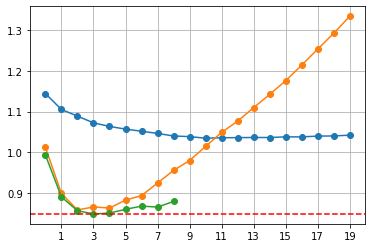

In [38]:
plt.plot(error,'o-')
plt.plot(errw, 'o-')
plt.plot(err_als, 'o-')
plt.axhline(y=errw_svd2,color='red',linestyle='--') #erreur minimale
plt.grid(True)
plt.xticks(np.arange(1,20, step=2))
plt.show() 

Graphiquement , on observe qu'on a amélioré les prédictions en pénalisant le problème des poids pondérées du SVD. 

Parmi les 3 méthodes celui là est la meilleure pour évaluer la note d'évaluation que les utilisateurs peuvent donner aux films 